# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Открываем файл с данными и изучаем общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#ознакомление с данными
display(data.info())
display(data.describe())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Вывод:  
В таблице 23699 строчки, и 22 колонки, которые состоят из данных, введенными пользователями, и данных, полученными автоматически. Сильно выделяется столбец is_apartment, где из 23699 строк заполнено только 2775, возможно пользователи самостоятельно заполняют данное поле и пропускают его при заполнении, логично пропуски заменить на False. Также много пропусков и в других стобцах. 
* Столбец first_day_exposition тип указан как object, переведём в datetime
* Столбец ceiling_height пропущенные значения
* Столбец floors_total пропущенные значения
* Столбец living_area пропущенные значения
* Столбец is_apartment пропущенные значения, тип указан как object, переведём в bool
* Столбец kitchen_area пропущенные значения
* Столбец balcony пропущенные значения
* Столбец locality_name пропущенные значения
* Столбец airports_nearest пропущенные значения
* Столбец cityCenters_nearest пропущенные значения
* Столбец parks_around3000 пропущенные значения
* Столбец parks_nearest пропущенные значения 
* Столбец ponds_around3000 пропущенные значения
* Столбец ponds_nearest пропущенные значения
* Столбец days_exposition пропущенные значения  


### Предобработка данных

Начнем по порядку, поменяем тип данных first_day_exposition на datetime, чтобы их можно было легко использовать в дальнейшем.

In [2]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') 
#data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64')

Переходим к столбцу ceiling_height. Сначало посмотрим на данные.

9195

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

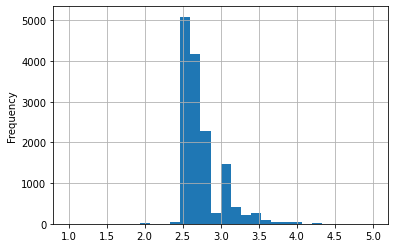

In [3]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(1,5), grid=True)#гистограмма
display(data['ceiling_height'].isna().sum()) # количество пропущенных строк
display(data['ceiling_height'].describe())

Имеются данные о высоте потолков в 1 и 100 м.будем считать их выбросами. Есть предположение что значения выше 20 метров и ниже 35 указаны без десятичной дроби, исправим данные.  
Также медианные значения не сильно отличаются от средних. Пропущенные же значения в количестве 9195 можно объяснить тем что большая часть продавцов не знает точной величины, заменим эти значения на медианные, т.к. они наименее подвержены искажениям и логически такая высота потолков наиболее распространена и стандарты строительства единообразны. 

In [4]:
def del_ceiling_height(ceiling_height): #cоздаем функцию
    height = float(ceiling_height)
    if 35> height > 20 :  #указываем значение между 20 и 35 метрами
        height = height / 10 #и делим её на 10
        return height
    return height 

data['ceiling_height'] = data['ceiling_height'].apply(del_ceiling_height) #вставляем результат функции
data.loc[data['ceiling_height'].isnull(),'ceiling_height']= data['ceiling_height'].median() #пропущенные значения подтягиваем к медиане

Столбец floors_total имеет небольшое количество пропусков, взглянем на данные.

86

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

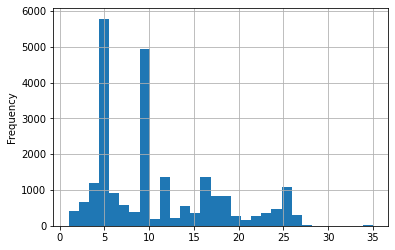

In [5]:
data['floors_total'].sort_values().plot(y = 'floors_total', kind = 'hist', bins = 30, range=(1,35), grid=True)#гистограмма
display(data['floors_total'].isna().sum())# количество пропущенных строк
display(data['floors_total'].describe())

Сам график выглядит как тени города, а 5-этажки и 9-этажки в нем небоскребы.  
Пропущенных значений не так много, просто удалим их.

In [6]:
data.dropna(subset = ['floors_total'], inplace=True)#сброс пропусков
data['floors_total'].isna().sum()# количество пропущенных строк

0

Переходим к living_area. Жилая площадь - это одна из основных ценообразующих характеристик. Поэтому приводить к медиане пропуски не будем. Посмотрим на изначальные характеристики чтобы иметь общее представление.

1870

count    21743.000000
mean        34.462781
std         22.037433
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

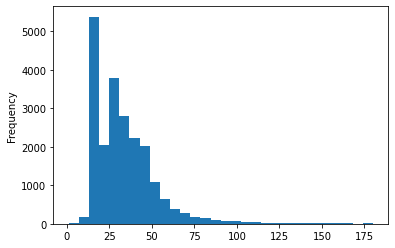

In [7]:
data['living_area'].sort_values().plot(y = 'living_area', kind = 'hist', bins = 30, range=(1,180)) #гистограмма
display(data['living_area'].isna().sum())# количество пропущенных строк
display(data['living_area'].describe())

Минимум в 2 метра выглядит подозрительно, но медианные и средние значения укладываются в логику. Как и говорили изначально вмешиваться в квадратуру не будем, просто удалим пропуски. 

In [8]:
data.dropna(subset = ['living_area'], inplace=True)#сброс пропусков
data['living_area'].isna().sum()# количество пропущенных строк

0

Переходим к столбцу is_apartment. Переведем тип данных в bool, а пропуски заменим на False. Т.к. владелец не вводил эти данные, значит скорее всего это не апартаменты.

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Со следующим столбцом kitchen_area, поступим точно так же как и с living_area.

'необработанных строк, было'

800

count    20943.000000
mean        10.511091
std          5.842044
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

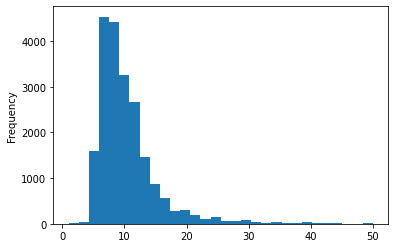

In [10]:
data['kitchen_area'].sort_values().plot(y = 'kitchen_area', kind = 'hist', bins = 30, range=(1,50)) #гистограмма
display('необработанных строк, было', data['kitchen_area'].isna().sum()) # количество пропущенных строк
display(data['kitchen_area'].describe())


In [11]:
data.dropna(subset = ['kitchen_area'], inplace=True) #сброс пропусков
display('необработанных строк, стало', data['kitchen_area'].isna().sum()) # количество пропущенных строк

'необработанных строк, стало'

0

Переходим к balcony, если значение пропущено, значит балкона скорее всего нет, поэтому поставим 0.

'необработанных строк, было'

9751

count    11192.000000
mean         1.158953
std          1.065801
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

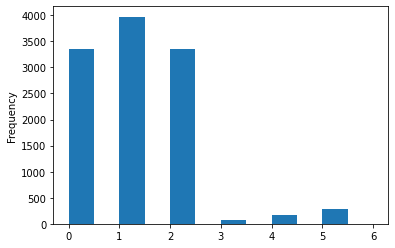

In [12]:
data['balcony'].sort_values().plot(y = 'balcony', kind = 'hist', bins = 12, range=(0,6)) #гистограмма
display('необработанных строк, было', data['balcony'].isna().sum()) # количество пропущенных строк
display(data['balcony'].describe()) 

In [13]:
data['balcony'] = data['balcony'].fillna(0)

Переходим к locality_name. Посмотрим сколько пропусков.

In [14]:
data['locality_name'].isna().sum()

38

Cтрок без названия населенного пункта немного(49), а причина их отсутствия неясна, удалим их.

In [15]:
data.dropna(subset = ['locality_name'],inplace = True)

Раз мы дошли населенных пунктов, проверим их на наличие дубликатов.

In [16]:
display(data['locality_name'].unique().tolist()) #список населенных пунктов указанных в датафрейме

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Колпино',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'деревня Старая',
 'деревня Лесколово',
 'село Путилово',
 'Ивангород',
 'Мурино',
 'Сланцы',
 'Шлиссельбург',
 'Сясьстрой',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 'поселок Новый Свет',
 'деревня Оржицы',
 'деревня Кальтино',

Видим большое количество неявных дубликатов. Приведем строки к нижнему регистру,заменим все "ё" на "е", и устраним путаницу в административном делении.

In [17]:
data['locality_name'] = data['locality_name'].str.lower() #приводим все значения к нижнему регистру
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') #заменим все 'ё' на 'е', чтобы посёлок=поселок
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок') # приравняем 'городской поселок' к' поселок'
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')# приравняем 'поселок городского типа' к' поселок
data['locality_name'].drop_duplicates().reset_index(drop=True) #сбросим дубликаты
display(data['locality_name'].unique().tolist())

['санкт-петербург',
 'поселок шушары',
 'поселок янино-1',
 'поселок парголово',
 'поселок мурино',
 'ломоносов',
 'сертолово',
 'петергоф',
 'пушкин',
 'деревня кудрово',
 'колпино',
 'гатчина',
 'деревня федоровское',
 'выборг',
 'кронштадт',
 'кировск',
 'деревня новое девяткино',
 'поселок металлострой',
 'поселок лебяжье',
 'поселок сиверский',
 'поселок молодцово',
 'поселок кузьмоловский',
 'садовое товарищество новая ропша',
 'павловск',
 'деревня пикколово',
 'всеволожск',
 'волхов',
 'кингисепп',
 'приозерск',
 'сестрорецк',
 'деревня куттузи',
 'поселок аннино',
 'деревня заклинье',
 'поселок торковичи',
 'поселок первомайское',
 'красное село',
 'поселок понтонный',
 'деревня старая',
 'деревня лесколово',
 'село путилово',
 'ивангород',
 'мурино',
 'сланцы',
 'шлиссельбург',
 'сясьстрой',
 'никольское',
 'зеленогорск',
 'сосновый бор',
 'поселок новый свет',
 'деревня оржицы',
 'деревня кальтино',
 'кудрово',
 'поселок романовка',
 'поселок бугры',
 'поселок рощино',
 'кир

Столбцы airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest,все эти столбцы относятся к географическим данным и так же имеют пропуски, но заполнить или удалить мы их не можем т.к. это может сильно исказить данные.  
Необходимо будет сообщить разработчикам о проблеме.  
Также есть пустые строки в столбце days_exposition, но возможно квартиры еще находятся в продаже или уже проданы, но объявления не сняты, пока не будем трогать эти данные.  
А пока просто распечатаем количество пустых строк в каждом из этих столбцов. 

In [18]:
print('пустые строки в airports_nearest:', data['airports_nearest'].isna().sum())
print('пустые строки в cityCenters_nearest:', data['cityCenters_nearest'].isna().sum())
print('пустые строки в parks_around3000:', data['parks_around3000'].isna().sum())
print('пустые строки в parks_nearest:', data['parks_nearest'].isna().sum())
print('пустые строки в ponds_around3000:', data['ponds_around3000'].isna().sum())
print('пустые строки в ponds_nearest:', data['ponds_nearest'].isna().sum())
print('пустые строки в ponds_nearest:', data['ponds_nearest'].isna().sum())
print('пустые строки в days_exposition:', data['days_exposition'].isna().sum())


пустые строки в airports_nearest: 4665
пустые строки в cityCenters_nearest: 4644
пустые строки в parks_around3000: 4643
пустые строки в parks_nearest: 13664
пустые строки в ponds_around3000: 4643
пустые строки в ponds_nearest: 12846
пустые строки в ponds_nearest: 12846
пустые строки в days_exposition: 2885


Посмотрим что у нас получилось.


In [19]:
display(data.info())
display(data.describe())
display(data.head())
display(data.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20905 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20905 non-null  int64         
 1   last_price            20905 non-null  float64       
 2   total_area            20905 non-null  float64       
 3   first_day_exposition  20905 non-null  datetime64[ns]
 4   rooms                 20905 non-null  int64         
 5   ceiling_height        20905 non-null  float64       
 6   floors_total          20905 non-null  float64       
 7   living_area           20905 non-null  float64       
 8   floor                 20905 non-null  int64         
 9   is_apartment          20905 non-null  bool          
 10  studio                20905 non-null  bool          
 11  open_plan             20905 non-null  bool          
 12  kitchen_area          20905 non-null  float64       
 13  balcony         

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,20905.000000,2.090500e+04,20905.000000,20905.000000,20905.000000,20905.000000,20905.000000,20905.000000,20905.000000,20905.000000,16240.000000,16261.000000,16262.000000,7241.000000,16262.000000,8059.000000,18020.000000
mean,10.093518,6.503258e+06,60.509551,2.095288,2.703759,10.560727,34.633910,5.836451,10.509280,0.619900,28790.589963,14247.130435,0.611794,487.876260,0.763252,519.548331,185.511099
std,5.675134,9.603551e+06,34.490375,1.064783,0.726165,6.518664,21.931774,4.813454,5.841913,0.970423,12653.955431,8670.023374,0.801276,337.722337,0.937914,277.570489,222.037847
min,0.000000,1.219000e+04,14.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.500000e+06,40.500000,1.000000,2.600000,5.000000,18.800000,2.000000,7.000000,0.000000,18518.000000,9350.000000,0.000000,287.000000,0.000000,294.500000,45.000000
50%,10.000000,4.700000e+06,52.100000,2.000000,2.650000,9.000000,30.100000,4.000000,9.000000,0.000000,26729.000000,13114.000000,0.000000,453.000000,0.000000,503.000000,102.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,15.000000,42.500000,8.000000,12.000000,1.000000,37228.000000,16257.000000,1.000000,610.000000,1.000000,733.000000,239.000000
max,50.000000,4.200000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,9.1,0.0,поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.5,4,False,...,6.00,0.0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,8.00,0.0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23698,4,1350000.0,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,...,9.00,0.0,поселок новый учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Промежуточный итог
Данные приведены в порядок, общий массив немного уменьшился, т.к. мы удалили строки в столбцах жилой площади (1903), площади кухни (814), имя населенного пункта (39). Но считаем что это было необходимо, ведь эти данные могут сильно повлиять на исследование.   
Часть пропущенных данных мы заменили на медианные значения т.к. они наименее сильно подвержены влияюнию выбросов. 
Заменили тип данных в столбце  first_day_exposition для дальнейшего использования, а также столбец is_apartment привели к типу данных bool, что тоже нам может понадобится.  
Так же необходимо отметить что та часть данных, которая,связана с географическими данными, нетронута т.к. массив достаточно большой и необходимо сообщить разработчикам о возникших затруднениях, ведь пропуски в этих столбцах достигают больше половины всех строк. В одном столбце parks_nearest пустых строк 13691, что составляет 57% от общего количества строк в данных.

### Посчитаем и добавим в таблицу новые столбцы

Нам, для полноты картины, необходимо добавить дополнительные столбцы  в таблицу.  
Все кто когда либо сталикавался с  приобретением недвижимости, сталикаваются с таким важным параметром как цена за квадратные метр. С него давайте и начнем и для простоты восприятия приведем их к сразу типу данных int


In [20]:
data['price_per_square_meter'] = data['last_price'] / data['total_area'] #ценнейшая цена за квадрат
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int') #удаление дробей, для легкости восприятия

Теперь нам нужно "разбить" столбец с датой наших объявлений на отдельные день недели, месяц, год.

In [21]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #день недели, [0-пн, 1-вт, 2-ср, 3-чт, 4-пт, 5-сб, 6-вс]
data['month_exposition'] = data['first_day_exposition'].dt.month #месяц
data['year_exposition'] = data['first_day_exposition'].dt.year #год


Некоторым клиентам важна информация от том первый ли это этаж или последний, дабы помочь им, создадим столбец отображающий данный параметр.

In [22]:
def floor_type(row): #строим функцию
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis = 1) #добавляем результат

Зачастую многие смотрят на удаленность недвижимости от центра населенного пункта, у нас уже есть такой параметр в таблице cityCenters_nearest, но дистанция указана в метрах, многим будет понятней в километрах, а заодно и округлим значения.

In [23]:
data['to_center_km'] = data['cityCenters_nearest'] / 1000
data['to_center_km'] = data['to_center_km'].fillna(value=0).astype(int) #fillna здесь помогает избежать ошибки, т.к. некоторые квартиры находятся очень близко к центру

Посмотрим что у нас получилось.

In [24]:
display(data.info())
display(data.describe())
display(data.head())
display(data.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20905 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            20905 non-null  int64         
 1   last_price              20905 non-null  float64       
 2   total_area              20905 non-null  float64       
 3   first_day_exposition    20905 non-null  datetime64[ns]
 4   rooms                   20905 non-null  int64         
 5   ceiling_height          20905 non-null  float64       
 6   floors_total            20905 non-null  float64       
 7   living_area             20905 non-null  float64       
 8   floor                   20905 non-null  int64         
 9   is_apartment            20905 non-null  bool          
 10  studio                  20905 non-null  bool          
 11  open_plan               20905 non-null  bool          
 12  kitchen_area            20905 non-null  float6

None

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,to_center_km
count,20905.000000,2.090500e+04,20905.000000,20905.000000,20905.000000,20905.000000,20905.000000,20905.000000,20905.000000,20905.000000,...,16262.000000,7241.000000,16262.000000,8059.000000,18020.000000,2.090500e+04,20905.000000,20905.000000,20905.000000,20905.000000
mean,10.093518,6.503258e+06,60.509551,2.095288,2.703759,10.560727,34.633910,5.836451,10.509280,0.619900,...,0.611794,487.876260,0.763252,519.548331,185.511099,9.919525e+04,2.547190,6.423152,2017.354365,10.696341
std,5.675134,9.603551e+06,34.490375,1.064783,0.726165,6.518664,21.931774,4.813454,5.841913,0.970423,...,0.801276,337.722337,0.937914,277.570489,222.037847,4.812190e+04,1.782464,3.467944,1.043836,9.549963
min,0.000000,1.219000e+04,14.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.500000e+06,40.500000,1.000000,2.600000,5.000000,18.800000,2.000000,7.000000,0.000000,...,0.000000,287.000000,0.000000,294.500000,45.000000,7.692300e+04,1.000000,3.000000,2017.000000,3.000000
50%,10.000000,4.700000e+06,52.100000,2.000000,2.650000,9.000000,30.100000,4.000000,9.000000,0.000000,...,0.000000,453.000000,0.000000,503.000000,102.000000,9.493600e+04,2.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,15.000000,42.500000,8.000000,12.000000,1.000000,...,1.000000,610.000000,1.000000,733.000000,239.000000,1.137610e+05,4.000000,10.000000,2018.000000,15.000000
max,50.000000,4.200000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,65.000000


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,to_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,82920,1,12,2018,первый,18
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785,3,8,2015,другой,13
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другой,8
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,...,NaN,NaN,NaN,55.0,95065,0,9,2018,другой,0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,to_center_km
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.5,4,False,...,NaN,NaN,NaN,413.0,45000,4,7,2017,другой,0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,352.0,1.0,675.0,239.0,73717,4,8,2016,другой,34
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,796.0,3.0,381.0,NaN,72490,1,3,2017,другой,4
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,NaN,NaN,NaN,45.0,52542,0,1,2018,другой,0
23698,4,1350000.0,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,...,NaN,NaN,NaN,NaN,41795,4,7,2017,первый,0


#### Промежуточный итог  
Мы добавили новые столбцы:
* цена одного квадратного метра - price_per_square_meter;
* день недели публикации объявления - weekday_exposition;
* месяц публикации объявления - year_exposition;
* год публикации объявления - year_exposition;
* тип этажа квартиры (значения — «‎первый», «последний», «другой») - floor_type;
* расстояние до центра города в километрах - to_center_km.

### Исследовательский анализ данных

#### Приступаем непосредственно к изучению данных.  
##### Общая площадь.

count    20905.000000
mean        60.509551
std         34.490375
min         14.000000
25%         40.500000
50%         52.100000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7a31a93490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7a31a93f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7a31a93280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7a31a84280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7a31a84820>],
 'means': []}

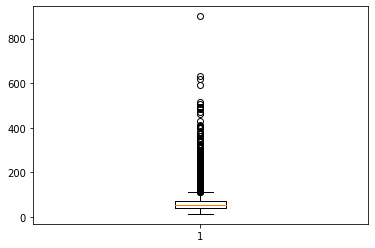

In [25]:
display(data['total_area'].describe())
plt.boxplot(data['total_area'])

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

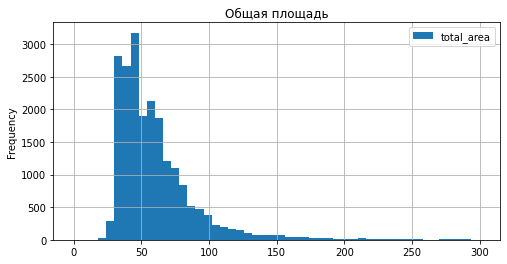

In [26]:
data.plot(y = 'total_area', kind = 'hist', bins = 50, grid=True, figsize = (8,4), range = (0,300), title ='Общая площадь')

Распределение общей площади нормальное. Медианное и среднее немного отличаются, но в рамках разумного. Диаграмма размаха показывает выбросы в сторону больших размеров квартир, но их количество не велико, а также стоит признать что в северной столице могут быть такие квартиры (в виде пентхаусов например), поэтому удалять их будет не правильно.

##### Жилая площадь.
Теперь точно так же рассмотрим жилую площадь. Но к диаграмме размаха уже обращаться не будем, т.к. там покажет такие разбросы. 

count    20905.000000
mean        34.633910
std         21.931774
min          2.000000
25%         18.800000
50%         30.100000
75%         42.500000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

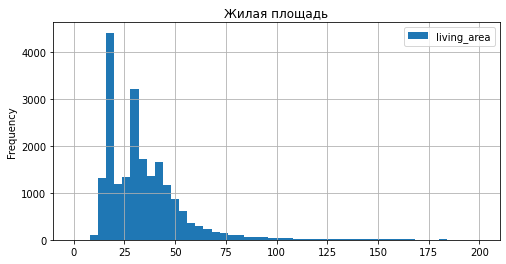

In [27]:
display(data['living_area'].describe())
data.plot(y = 'living_area', kind = 'hist', bins = 50, grid=True, figsize = (8,4), range = (0,200), title ='Жилая площадь')

Так же можем отметить нормальное распределение данных и некоторые выбросы, которые дают разницу между медианной и средними значениями.

##### Площадь кухни.

count    20905.000000
mean        10.509280
std          5.841913
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

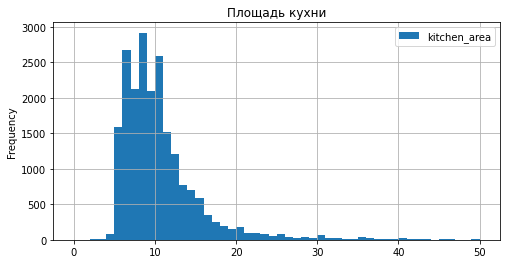

In [28]:

display(data['kitchen_area'].describe())
data.plot(y = 'kitchen_area', kind = 'hist', bins = 50, grid=True, figsize = (8,4), range = (0,50), title ='Площадь кухни')

По кухне примерна та же картина что и ранее.  
В целом мы можем сказать что по площадям имеются выбросы, от очень больших квартир, но их существование мы отрицать не можем.

##### Цена объекта

count    2.090500e+04
mean     6.503258e+06
std      9.603551e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.200000e+08
Name: last_price, dtype: float64

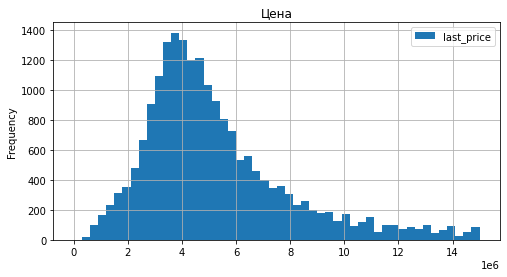

In [29]:
display(data['last_price'].describe())
data.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, range = (0,15000000), figsize = (8,4),title ='Цена')
plt.ticklabel_format(axis='x', scilimits=(6, 6))

Что интересно, в цене пик оказался единый.

##### Количество комнат.

count    20905.000000
mean         2.095288
std          1.064783
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='Frequency'>

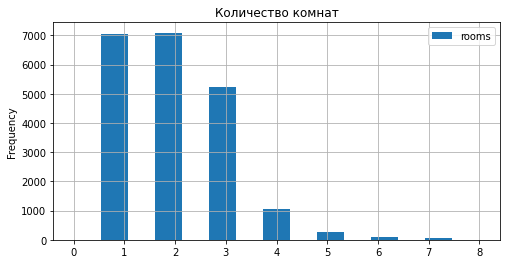

In [30]:
display(data['rooms'].describe())
data.plot(y = 'rooms', kind = 'hist', bins = 15, grid=True, range = (0,8), figsize = (8,4),title ='Количество комнат')

Однокомнатные и двухкомнатные квартиры идут ноздря в ноздрю.  
##### Высота потолков.

count    20905.000000
mean         2.703759
std          0.726165
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

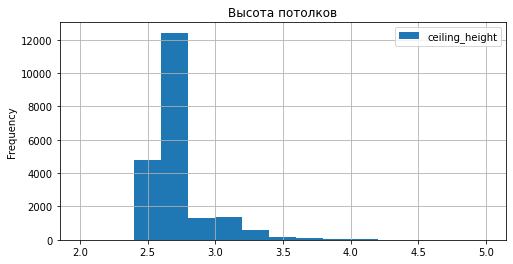

In [31]:
display(data['ceiling_height'].describe())
data.plot(y = 'ceiling_height', kind = 'hist', bins = 15, grid=True, range = (2,5), figsize = (8,4),title ='Высота потолков')

Тут стоит подчеркнуть, что при стадии предобработки данных мы на пропущенные значения подставили медианные.  
##### Этаж квартиры

count    20905.000000
mean         5.836451
std          4.813454
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:title={'center':'Этаж'}, ylabel='Frequency'>

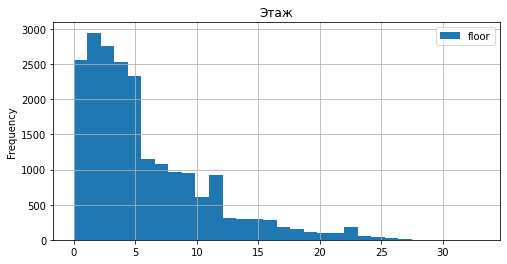

In [32]:
display(data['floor'].describe())
data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, range = (0,33), figsize = (8,4),title ='Этаж')

По гистограмме ясно видно что большая часть продающихся квартир находятся в пределах первых 5 этажей.

##### Тип этажа

count      20905
unique         3
top       другой
freq       15360
Name: floor_type, dtype: object

<AxesSubplot:>

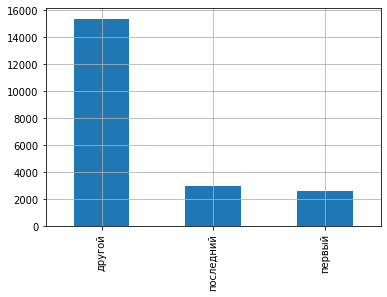

In [33]:
display(data['floor_type'].describe())
data['floor_type'].value_counts().plot(kind='bar', grid=True)

Большинство объявлений это не первые и не последние, но другие. Что в принципе и логично.

##### общее количество этажей в доме.

count    20905.000000
mean        10.560727
std          6.518664
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'Этаж'}, ylabel='Frequency'>

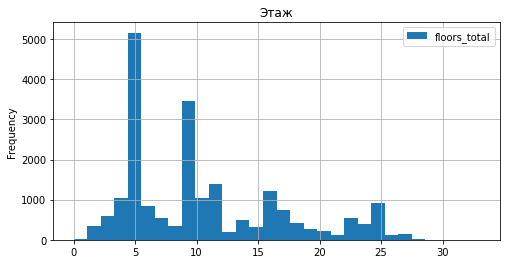

In [34]:
display(data['floors_total'].describe())
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, range = (0,33), figsize = (8,4),title ='Этаж')

##### Растояние до центра.

count    16261.000000
mean     14247.130435
std       8670.023374
min        181.000000
25%       9350.000000
50%      13114.000000
75%      16257.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:title={'center':'Растояние до центра в метрах'}, ylabel='Frequency'>

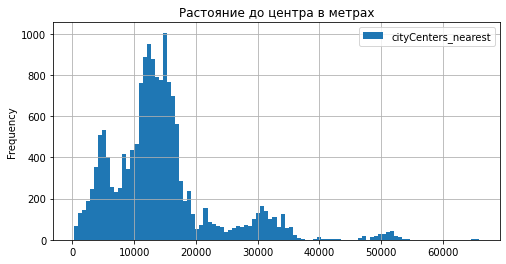

In [35]:
display(data['cityCenters_nearest'].describe())
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, range = (181,65968), figsize = (8,4),title ='Растояние до центра в метрах')

count    20905.000000
mean        10.696341
std          9.549963
min          0.000000
25%          3.000000
50%         11.000000
75%         15.000000
max         65.000000
Name: to_center_km, dtype: float64

<AxesSubplot:title={'center':'Растояние до центра в километрах'}, ylabel='Frequency'>

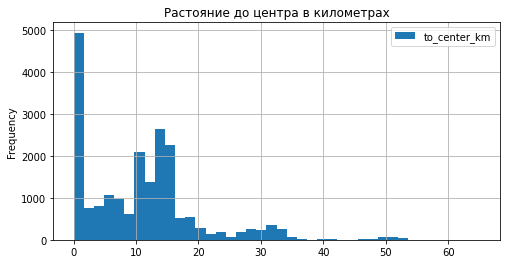

In [36]:
display(data['to_center_km'].describe())
data.plot(y = 'to_center_km', kind = 'hist', bins = 40, grid=True, range = (0,65), figsize = (8,4),title ='Растояние до центра в километрах')

##### Расстояние до ближайшего аэропорта.

count    16240.000000
mean     28790.589963
std      12653.955431
min          0.000000
25%      18518.000000
50%      26729.000000
75%      37228.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:title={'center':'Растояние до аэропорта в метрах'}, ylabel='Frequency'>

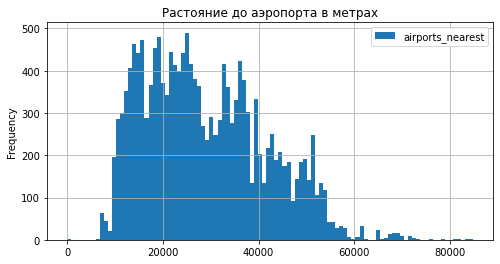

In [37]:
display(data['airports_nearest'].describe())
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, range = (0,84869), figsize = (8,4),title ='Растояние до аэропорта в метрах')

##### Расстояние до ближайшего парка.

count    7241.000000
mean      487.876260
std       337.722337
min         1.000000
25%       287.000000
50%       453.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:title={'center':'Растояние до парка в метрах'}, ylabel='Frequency'>

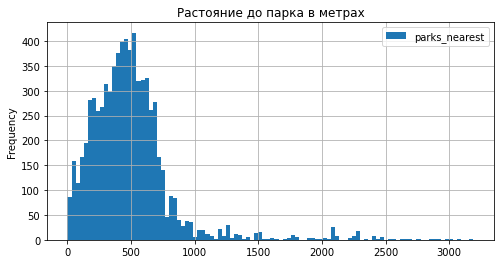

In [38]:
display(data['parks_nearest'].describe())
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, range = (0,3190), figsize = (8,4),title ='Растояние до парка в метрах')

Немного информации лучше чем её отсутствие. 

##### День и месяц публикации объявления.

count    20905.000000
mean         2.547190
std          1.782464
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

<AxesSubplot:title={'center':'День недели'}, ylabel='Frequency'>

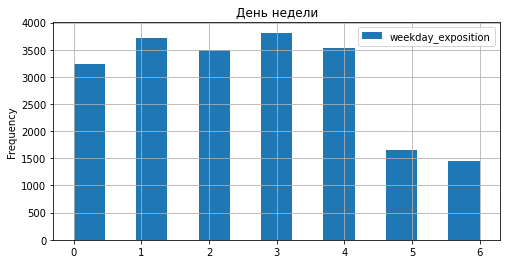

In [39]:
display(data['weekday_exposition'].describe())
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 13, grid=True, range = (0,6), figsize = (8,4),title ='День недели')

count    20905.000000
mean         6.423152
std          3.467944
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

<AxesSubplot:title={'center':'Месяц'}, ylabel='Frequency'>

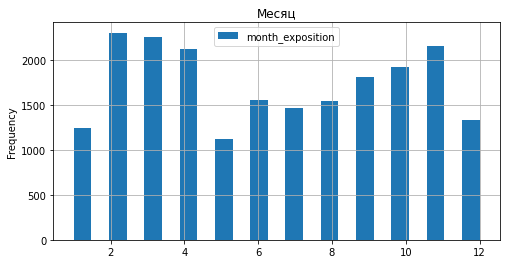

In [40]:
display(data['month_exposition'].describe())
data.plot(y = 'month_exposition', kind = 'hist', bins = 23, grid=True, range = (1,12), figsize = (8,4),title ='Месяц')

Как мы видим по гистограммам, активность публикаций снижается по выходным. Так же наблюдаем снижение активности публикаций в Январе и Мае, что интересно в эти месяцы рабочих дней всегда меньше. Возможно это связано с рабочим графиком риелторских контор ну и/или продавцы тоже отдыхают.  

##### Промежуточный итог
Из построенных гистаграм и показателям столбцом, мы можем выстроить медианный портрет квартиры.  
У такой квартиры будет 52 кв.м. общей площади из них 30 кв.м. будут на жилую площадь, а 9 кв.м. будут приходится на кухню. У неё будет 2 комнаты, 2,6 м. высоты потолок, распологаться скорее всего она будет где то со 2 по 5 этаж, а сам дом при этом будет скорее всего либо 5 этажным или 9 этажным. Далее у нас мало данных (всё еще держим в голове что нужно сообщить о проблеме геолокаций разработчикам), но исходя из того что есть, обычно в 10 км. от центра, тут можно предположить что это будет спальный район, ближайший парк будет в 500 метрах, а аэропорт в 26 км. И медианная цена за такую медианную квартиру в Санкт-Петербурге и Ленинградской области составит 4,7 млн. руб. 

#### Время продажи квартиры. 
Построим гистограмму. Посчитаем среднее и медиану.

count    18020.000000
mean       185.511099
std        222.037847
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0.5, 0, 'количество дней')

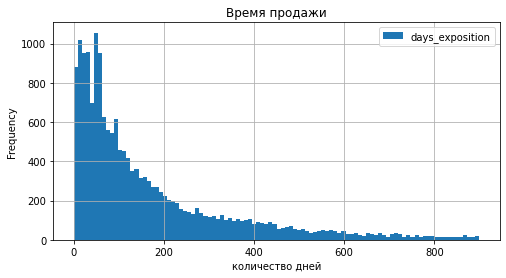

In [41]:
display(data['days_exposition'].describe())
data.plot(y='days_exposition', kind='hist', bins=100, figsize=(8,4), range=(0,900), title='Время продажи', grid=True)
plt.xlabel("количество дней")

Среднее (185) и медианное значение (102) сильно отличаются, скорее всего имеют место выбросы. Построим диаграмму размаха.

Text(0, 0.5, 'days')

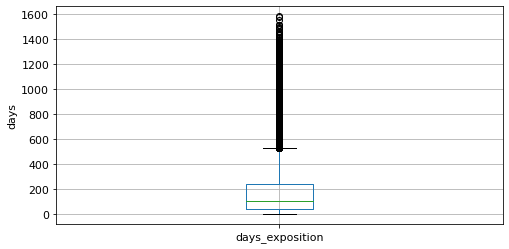

In [42]:
data.boxplot(["days_exposition"], figsize=(8,4), fontsize=11)
plt.ylabel("days", fontsize=11)

Необоснованно быстрых значений нет, а необоснованно долгие - около 500 дней и выше. Посчитаем что нормальные значения у нас лежат 1-500. При том что бесплатное размещение составляет 120 дней. Поэтому пока уберем значения больше 500 создав новую переменную.


count    16430.000000
mean       130.133597
std        120.318018
min          1.000000
25%         40.000000
50%         89.000000
75%        187.000000
max        499.000000
Name: days_exposition, dtype: float64

45.0    518
60.0    340
7.0     202
30.0    196
4.0     159
3.0     146
90.0    136
14.0    133
20.0    132
5.0     132
Name: days_exposition, dtype: int64

<AxesSubplot:title={'center':'Время продажи'}, ylabel='Frequency'>

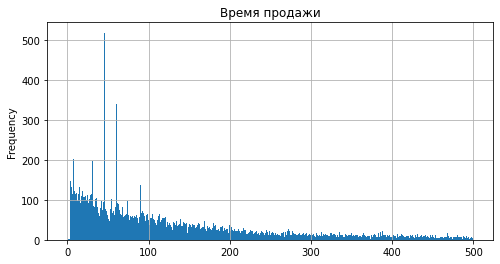

In [43]:
good_exposition_data = data.query('0<=days_exposition<500')['days_exposition'] #создаем срез переменную
display(good_exposition_data.describe())
display(good_exposition_data.value_counts().head(10)) # глянем топ-10 дней в продаже
good_exposition_data.plot(kind='hist', bins=500, figsize=(8,4), range=(0,500), title='Время продажи', grid=True)

Значения 7, 30, 45, 60, 90 очень сильно выделяются. Возможно это связано с правилами размещения объявлений либо с техническими особенностями платформы. Средняя и медианные значения всё еще сильно отличаются. Но в целом мы уже можем сделать вывод что продажи произошедшие быстрее 40 дней это довольно таки быстро, а объявление которому уже полгода, уже старожил, но если объявлению больше 500 дней, это уже аномалия. 

#### Факторы цены квартиры.
##### Квадраты метров.  
В современных условиях многие смотрят не только на общую площадь, но так же на непосредственно жилую её часть и на кухню, перейдемте к ним.


корелляция цены от общей площади 0.6911471317457503
корелляция цены от жилой площади 0.6030484650627516
корелляция цены от площади кухни 0.5179578010456699


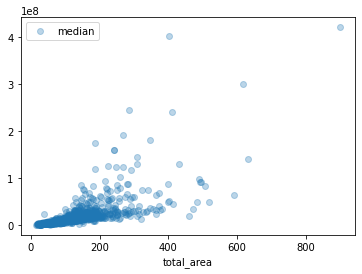

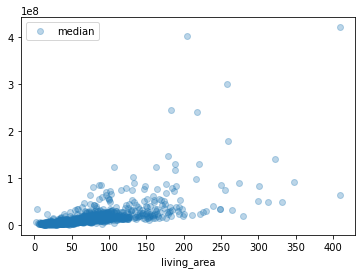

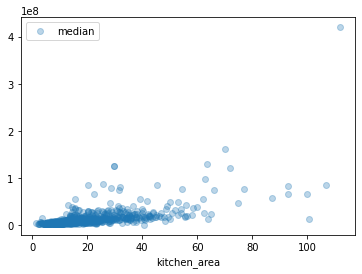

In [44]:
total_area_table = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
total_area_table.columns = ['mean', 'count', 'median']
total_area_table.plot(y = 'median', style = 'o', alpha=0.3)
print('корелляция цены от общей площади', data['total_area'].corr(data['last_price']))

living_area_table = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
living_area_table.columns = ['mean', 'count', 'median']
living_area_table.plot(y = 'median', style = 'o', alpha=0.3)
print('корелляция цены от жилой площади', data['living_area'].corr(data['last_price']))

kitchen_area_table = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
kitchen_area_table.columns = ['mean', 'count', 'median']
kitchen_area_table.plot(y = 'median', style = 'o', alpha=0.3)
print('корелляция цены от площади кухни', data['kitchen_area'].corr(data['last_price']))

Наблюдаем некоторую зависимость цены в почти равной степени общей и жилой площади, но видимо размеры кухни не столь сильно влияет на цену. Хотя в целом можно прийти к выводу что с увеличением площади цена возрастает, что логично.

##### Цена от комнат.
Посмотрим зависит ли цена от количества комнат.

0.3907933873044743

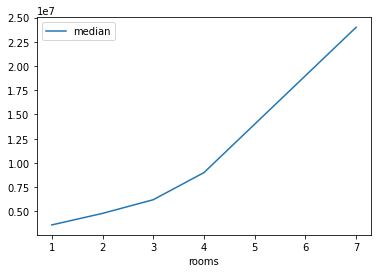

In [45]:
rooms_table = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
rooms_table.columns = ['mean', 'count', 'median']
rooms_table.query('count > 50').plot(y = 'median')
data['rooms'].corr(data['last_price'])

Логично что с увеличением количества комнат, растет цена.  

##### Цена от типа этажа.

Text(0.5, 0, 'Стоимость')

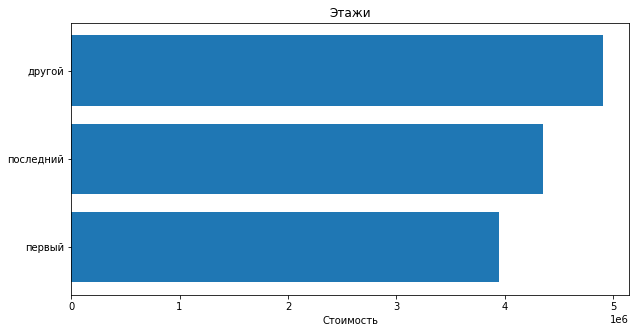

In [46]:
floor_price = data[['floor_type', 'last_price']].groupby(['floor_type']).median().sort_values('last_price')
plt.figure(figsize=(10,5))
plt.barh( floor_price.index, floor_price['last_price'])
plt.title("Этажи")
plt.xlabel("Стоимость")

Квартиры на первом и последнем этаже стоят дешевле.

##### Цена от времени.
Теперь посмотрим насколько цена зависит от даты размещения объявления.

<AxesSubplot:xlabel='weekday_exposition'>

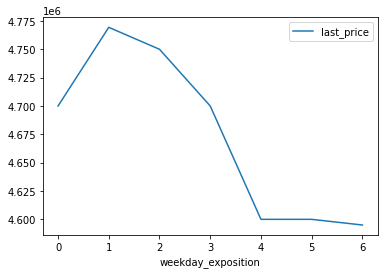

In [47]:
weekday_exposition_table = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
weekday_exposition_table.plot(y = 'median')

С понедельника по четверг медианная цена за квартиру 4,7 млн. когда как с пятницы по воскресенье 4.6 млн. Скорее всего это связано с деятельностью риелторских фирм(которые берут % или фиксированную сумму от продажи кв.), по выходным они отдыхают, но пятницу пока никак н
Перейдем пока к месяцам объявлений.

<AxesSubplot:xlabel='month_exposition'>

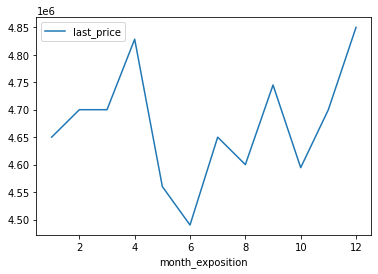

In [48]:
month_exposition_table = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month_exposition_table.plot(y = 'median')

Самые низкие цены отмечаем в июне, а самые дорогие в апреле и в декабре.

<AxesSubplot:xlabel='year_exposition'>

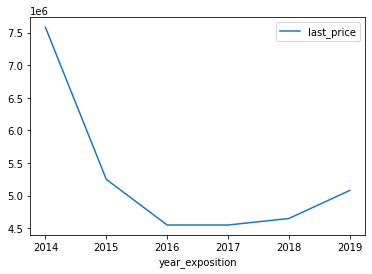

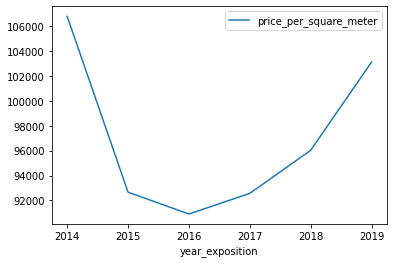

In [49]:
year_exposition_price = data.pivot_table(index = 'year_exposition', values ='last_price', aggfunc = ['mean', 'count', 'median'])
year_exposition_price.plot(y = 'median')
year_exposition_per_meter = data.pivot_table(index = 'year_exposition', values ='price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
year_exposition_per_meter.plot(y = 'median')

Из наблюдаемых данных пик цен приходился на 2014 год, в дальнейшем же цены упали. Абсолютные цены начали расти только к 2018-19 годам, а цена за квадратный метр начала расти уже в 2017. 

####  Cредняя цена 1 кв.м. в 10 населённых пунктах с наибольшим числом объявлений.


In [50]:
locality_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean', 'median'])
locality_table.columns = ['count', 'mean', 'median']
locality_table = locality_table.sort_values('count', ascending = False).head(10)
display(locality_table)

,count,mean,median
locality_name,,,
санкт-петербург,14037,113916.369310,104231.0
поселок мурино,430,85366.088372,84922.0
поселок шушары,392,78393.239796,77222.5
всеволожск,357,69028.689076,65789.0
пушкин,337,103290.851632,100000.0
колпино,322,75225.869565,74723.5
гатчина,290,68635.165517,67745.5
поселок парголово,288,90755.586806,92271.5
деревня кудрово,226,92248.000000,91714.5


Наиболее дорогие квартиры наблюдаются в северной столице, там и средние и медианные цены за квадратный метр выше чем по Ленинградской области. Самое дешевое же жилье из первой десятки в Выборге. 
#### Оценка стоимости в зависимости от удаленности от центра.


In [58]:
spb_data = data.query('locality_name == "санкт-петербург"')

Text(0, 0.5, 'Стоимость')

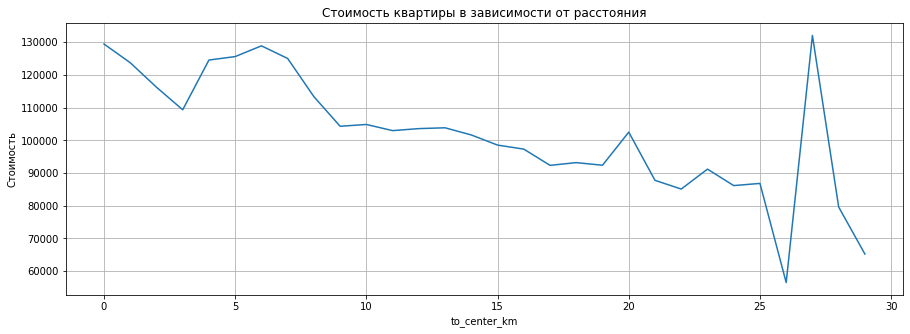

In [56]:
plt.figure(figsize=(15,5))
spb_data.groupby('to_center_km')['price_per_square_meter'].median().plot(grid=True)
plt.title("Стоимость квартиры в зависимости от расстояния")
plt.ylabel("Стоимость")


In [60]:
 #странный выброс далее 25 км.
spb_data.query('to_center_km>26 and price_per_square_meter>100000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_type,to_center_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,1496.0,0.0,NaN,128.0,193918,1,11,2017,другой,27
1111,0,4072000.0,38.0,2015-10-14,1,2.65,5.0,16.0,4,False,...,NaN,0.0,NaN,285.0,107157,2,10,2015,другой,28


Наиболее дорогие цены за квадратный метр жилья в Санкт-Петербурге наблюдаются в радиусе 9 км. от центра города. Это легко объяснить удобством транспортной инфраструктуры (спрос на квартиры около метро всегда высок).Падение стоимости идет до 27 км. а потом идет ввысь, здесь мы видим 2 объявления выброса.

### Общий вывод

Мы получили и обработали архив данных о продажах квартир с 2014 по 2019 год содержавший в себе 23699 строк(объявлений).   
Данные делились на 2 крупные части:
* Данные заполненные пользователем
* Картографические  

По второму типу данных необходимо сообщить разработчикам, т.к. довольно крупный массив данных там отсутствует, а именно:  
пустые строки в airports_nearest: 4665  
пустые строки в cityCenters_nearest: 4644  
пустые строки в parks_around3000: 4643  
пустые строки в parks_nearest: 13664  
пустые строки в ponds_around3000: 4643  
пустые строки в ponds_nearest: 12846  
пустые строки в days_exposition: 2885  

Так же мы примерно представили себе из этих данных медианную квартиру и она выглядела примерно так: 
У неё 52 кв.м. общей площади из них 30 кв.м. жилая площадь, а 9 кв.м. приходятся на кухню. У неё 2 комнаты, 2,6 м. высоты потолки, распологается скорее всего она где то со 2 по 5 этаж, а сам дом при этом скорее всего либо 5 этажный или 9 этажный. Далее у нас мало данных, но исходя из того что есть, обычно в 10 км. от центра, тут можно предположить что это будет спальный район, ближайший парк будет в 500 метрах, а аэропорт в 26 км. И медианная цена за такую медианную квартиру в Санкт-Петербурге и Ленинградской области составит 4,7 млн. руб.

Также мы выяснили что самые низкие цены, за наблюдаемый период, пришлись на 2016 год, а самые высокие на 2014.

Благодаря наблюдениям за ценами в разные дни недели, можно предположить что площадкой в будние дни, активно пользуются риелторские фирмы. Было бы неплохо добавить для них отдельную пометку, о том что это продажа идет от агента. В будущем такая информация поможет анализу данных. 

Так же мы можем утверждать что в Санкт-Петербурге недвижимость  дороже чем по Ленинградской области, в северной столице медианная цена за квадратный метр составила 104 231 рубля, но чем ближе к центру, тем дороже стоимость, где она достигает и 130 000 рублей. 
Закономерность же зависимости цены от близости к центру города подтверждена, цена дальше 7го км от центра, начинает значительно снижаться. 
